##Apple Stock

**Introduction:**

We are going to use Apple's stock price.

Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


Step 4. Check out the type of the columns


In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


Step 5. Transform the Date column as a datetime type


In [4]:
apple.Date = pd.to_datetime(apple.Date)
apple['Date'].head()

,Date
0,2014-07-08
1,2014-07-07
2,2014-07-03
3,2014-07-02
4,2014-07-01


Step 6. Set the date as the index


In [5]:
apple.set_index('Date', inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


Step 7. Is there any duplicate dates?


In [6]:
apple.index.is_unique

True

Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.


In [7]:
apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


Step 9. Get the last business day of each month


In [8]:
apple.resample('BME').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


In [9]:
# Identify the Action: Does it ask for the value on that day, or the average of the month?

# If "Average/Sum/Mean": Use .resample('BME').mean()

# If "Value on that specific day": Use .asfreq('BME')


In [10]:
apple.resample('BMS').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-01,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-01,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-02,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-02,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-01,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-03,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-01,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-01,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


Step 10. What is the difference in days between the first day and the oldest


In [11]:
(apple.index.max() -apple.index.min())

Timedelta('12261 days 00:00:00')

Step 11. How many months in the data we have?


In [12]:
apple_months = apple.resample('BM').mean()
len(apple_months)

/tmp/ipython-input-3025601576.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple_months = apple.resample('BM').mean()


404

Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches


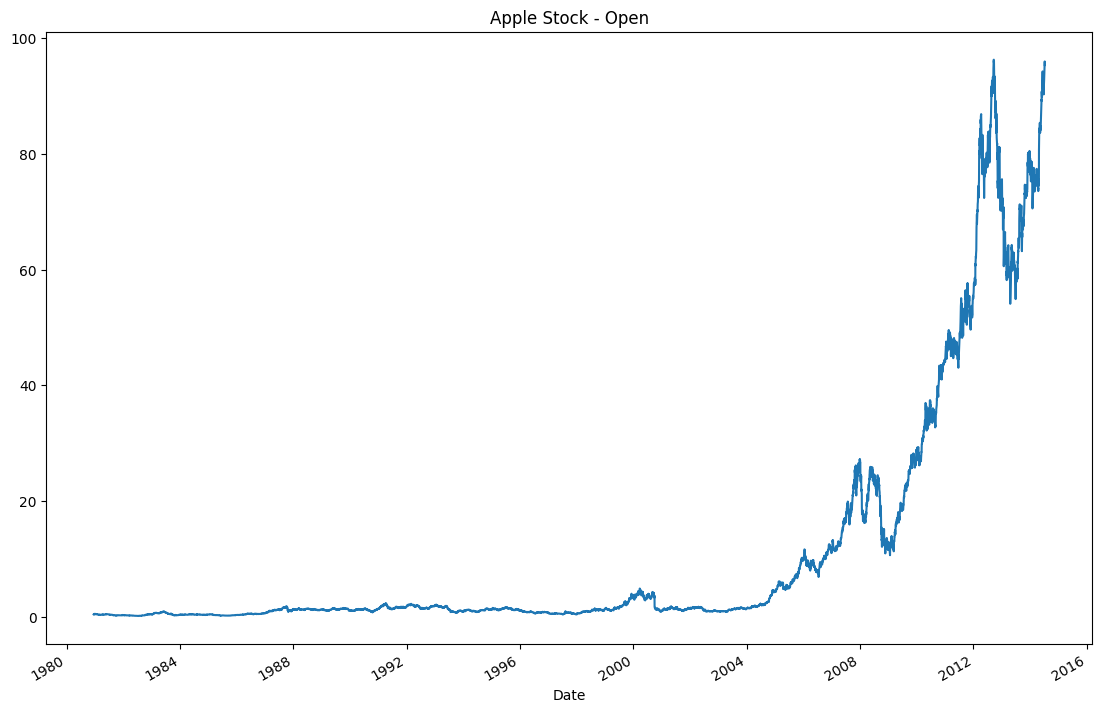

In [13]:
apple_open = apple['Adj Close'].plot(title='Apple Stock - Open')
fig = apple_open.get_figure()
fig.set_size_inches(13.5, 9)

##Getting Financial Data - Pandas Datareader


**Introduction:**
This time you will get data from a website.

Step 1. Import the necessary libraries

In [14]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web # package to extract data from various Internet sources into a DataFrame



Step 2. Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is).


In [15]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.today()
start

datetime.datetime(2015, 1, 1, 0, 0)

Step 3. Get an API key for one of the APIs that are supported by Pandas Datareader, preferably for AlphaVantage.


In [16]:
api_key = 'MWYOQTYAPIK8ITDG'

Step 4. Use Pandas Datarader to read the daily time series for the Apple stock (ticker symbol AAPL) between 01/01/2015 and today, assign it to df_apple and print it.


In [17]:
import yfinance as yf
df_apple = yf.download('AAPL', start, auto_adjust=True)
df_apple

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237545,24.705314,23.798595,24.694229,212818400
2015-01-05,23.554737,24.086797,23.368517,24.006988,257142000
2015-01-06,23.556965,23.816344,23.195606,23.619038,263188400
2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600
2015-01-08,24.805086,24.862726,24.097889,24.215387,237458000
...,...,...,...,...,...
2025-12-15,274.109985,280.149994,272.839996,280.149994,50409100
2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600


In [18]:
# df_apple = web.DataReader(
#     'AAPL',
#     'av-daily',
#     start,
#     end,
#     api_key=api_key
# )
# df_apple #This did not work cause Alpha Vantage is now premium

Step 5. Add a new column "stock" to the dataframe and add the ticker symbol


In [19]:
df_apple['stock'] = 'AAPL'
df_apple.head()

Price,Close,High,Low,Open,Volume,stock
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2015-01-02,24.237545,24.705314,23.798595,24.694229,212818400,AAPL
2015-01-05,23.554737,24.086797,23.368517,24.006988,257142000,AAPL
2015-01-06,23.556965,23.816344,23.195606,23.619038,263188400,AAPL
2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600,AAPL
2015-01-08,24.805086,24.862726,24.097889,24.215387,237458000,AAPL


Step 6. Repeat the two previous steps for a few other stocks, always creating a new dataframe: Tesla, IBM and Microsoft. (Ticker symbols TSLA, IBM and MSFT.)


In [20]:
df_tesla = yf.download('TSLA', start, auto_adjust=True)
df_tesla['stock'] = 'TSLA'
df_tesla.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,stock
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,TSLA
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,TSLA
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,TSLA
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,TSLA
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,TSLA


In [21]:
df_microsoft = yf.download('MSFT', start, auto_adjust=True)
df_microsoft['stock'] = 'MSFT'
df_microsoft.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,stock
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,
2015-01-02,39.858444,40.421031,39.670917,39.773205,27913900,MSFT
2015-01-05,39.491913,39.832873,39.423719,39.526007,39673900,MSFT
2015-01-06,38.912285,39.849929,38.818520,39.534540,36447900,MSFT
2015-01-07,39.406685,39.602738,38.775907,39.193584,29114100,MSFT
2015-01-08,40.565945,40.702329,39.824353,39.849925,29645200,MSFT


In [22]:
df_ibm = yf.download('IBM', start, auto_adjust=True)
df_ibm['stock'] = 'IBM'
df_ibm.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,stock
Ticker,IBM,IBM,IBM,IBM,IBM,
Date,,,,,,
2015-01-02,98.123032,98.879879,97.481231,97.668931,5779673,IBM
2015-01-05,96.579109,97.644744,96.385360,97.644744,5104898,IBM
2015-01-06,94.496254,96.851549,93.951333,96.675958,6429448,IBM
2015-01-07,93.878670,95.180439,93.261087,95.180439,4918083,IBM
2015-01-08,95.919121,96.294510,94.181409,94.599184,4431693,IBM


Step 7. Combine the four separate dataFrames into one combined dataFrame df that holds the information for all four stocks


In [23]:
frames = [df_apple, df_tesla, df_ibm, df_microsoft]
df = pd.concat(frames)
df

Price,Close,High,Low,Open,Volume,stock,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,TSLA,TSLA,TSLA,TSLA,...,IBM,IBM,IBM,IBM,IBM,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.237545,24.705314,23.798595,24.694229,212818400.0,AAPL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,23.554737,24.086797,23.368517,24.006988,257142000.0,AAPL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,23.556965,23.816344,23.195606,23.619038,263188400.0,AAPL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600.0,AAPL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,24.805086,24.862726,24.097889,24.215387,237458000.0,AAPL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-15,NaN,NaN,NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,474.820007,480.720001,472.519989,480.100006,23727700.0
2025-12-16,NaN,NaN,NaN,NaN,NaN,MSFT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,476.390015,477.890015,470.880005,471.910004,20705600.0


Step 8. Shift the stock column into the index (making it a multi-level index consisting of the ticker symbol and the date).


In [24]:
df.set_index(keys='stock', append=True, inplace=True)
df

,Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,TSLA,TSLA,TSLA,TSLA,TSLA,IBM,IBM,IBM,IBM,IBM,MSFT,MSFT,MSFT,MSFT,MSFT
Date,stock,,,,,,,,,,,,,,,,,,,,
2015-01-02,AAPL,24.237545,24.705314,23.798595,24.694229,212818400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,AAPL,23.554737,24.086797,23.368517,24.006988,257142000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,AAPL,23.556965,23.816344,23.195606,23.619038,263188400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,AAPL,23.887280,23.987040,23.654503,23.765348,160423600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,AAPL,24.805086,24.862726,24.097889,24.215387,237458000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-15,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,474.820007,480.720001,472.519989,480.100006,23727700.0
2025-12-16,MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.390015,477.890015,470.880005,471.910004,20705600.0


Step 7. Create a dataFrame called vol, with the volume values.


In [25]:
vol = df[['Volume']]

In [26]:
vol1 = df['Volume']
vol1 = pd.DataFrame(vol1)
vol1

,Ticker,AAPL,TSLA,IBM,MSFT
Date,stock,,,,
2015-01-02,AAPL,212818400.0,NaN,NaN,NaN
2015-01-05,AAPL,257142000.0,NaN,NaN,NaN
2015-01-06,AAPL,263188400.0,NaN,NaN,NaN
2015-01-07,AAPL,160423600.0,NaN,NaN,NaN
2015-01-08,AAPL,237458000.0,NaN,NaN,NaN
...,...,...,...,...,...
2025-12-15,MSFT,NaN,NaN,NaN,23727700.0
2025-12-16,MSFT,NaN,NaN,NaN,20705600.0
2025-12-17,MSFT,NaN,NaN,NaN,24527200.0


In [27]:
vol

Price                  Volume                     
Ticker                   AAPL TSLA IBM        MSFT
Date       stock                                  
2015-01-02 AAPL   212818400.0  NaN NaN         NaN
2015-01-05 AAPL   257142000.0  NaN NaN         NaN
2015-01-06 AAPL   263188400.0  NaN NaN         NaN
2015-01-07 AAPL   160423600.0  NaN NaN         NaN
2015-01-08 AAPL   237458000.0  NaN NaN         NaN
...                       ...  ...  ..         ...
2025-12-15 MSFT           NaN  NaN NaN  23727700.0
2025-12-16 MSFT           NaN  NaN NaN  20705600.0
2025-12-17 MSFT           NaN  NaN NaN  24527200.0
2025-12-18 MSFT           NaN  NaN NaN  28573500.0
2025-12-19 MSFT           NaN  NaN NaN  70824900.0

[11036 rows x 4 columns]

Step 8. Aggregate the data of volume to weekly.

Hint: Be careful to not sum data from the same week of 2015 and other years.



In [29]:
# date = vol.index.get_level_values(0)
# date = pd.DatetimeIndex(date) # ensure that it's a datetimeindex, instead of a regular index

# vol['week'] = date.isocalendar().week.values
# # .values is necessary to obtain only the week *values*
# # otherwise pandas interprets it as a part of an index; this would be a problem as the same week appears multiple times
# # (same week number in different years, same week for different stocks)

# vol['year'] = date.year

# pd.pivot_table(vol, values='volume', index=['year', 'week'],
#                columns=['stock'], aggfunc=np.sum)

In [ ]:
# vol_weekly = (
#     df[['Volume']]
#     .reset_index()
#     .groupby('stock')
#     .resample('W', on='Date')
#     .sum()
#     .droplevel(level=0)
#     .rename_axis('stock', level=1)
#     )
# vol_weekly = vol_weekly.unstack(level='stock')
# print(vol_weekly.head())

In [31]:
# # 1. Take the data out of the complex MultiIndex format
# # This makes 'Date' and 'stock' regular columns again
# vol_flat = df[['Volume']].reset_index()

# # 2. Use a Pivot table (Modern way) combined with Resample
# # We pivot FIRST so each stock has its own column
# vol_pivot = vol_flat.pivot(index='Date', columns='stock', values='Volume')

# # 3. Now resampling is incredibly easy because the Index is JUST dates
# # 'W' handles the "same week different years" problem automatically
# vol_weekly = vol_pivot.resample('W').sum()

# vol_weekly.head()

In [33]:
# 1. Flatten the data completely and ensure we only have 1D columns
# We use .columns.get_level_values if there's a multi-index on the columns
vol_flat = df.reset_index()
if isinstance(vol_flat.columns, pd.MultiIndex):
    vol_flat.columns = vol_flat.columns.get_level_values(0)

# 2. Use pivot_table - this is more robust than .pivot()
# It handles the "1-dimensional" error by aggregating if duplicates exist
vol_pivot = vol_flat.pivot_table(index='Date', columns='stock', values='Volume', aggfunc='sum')

# 3. Resample to Weekly
# 'W' is the modern alias for 'W-SUN' (Week ending Sunday)
vol_weekly = vol_pivot.resample('W').sum(min_count=1)

vol_weekly.dropna(how='all')

vol_weekly.head()

stock,AAPL,IBM,MSFT,TSLA,AAPL,IBM,MSFT,TSLA,AAPL,IBM,MSFT,TSLA,AAPL,IBM,MSFT,TSLA
Date,,,,,,,,,,,,,,,,
2015-01-04,2.128184e+08,0.0,0.0,0.0,0.0,0.0,0.0,71466000.0,0.0,5779673.0,0.0,0.0,0.0,0.0,27913900.0,0.0
2015-01-11,1.133010e+09,0.0,0.0,0.0,0.0,0.0,0.0,340644000.0,0.0,25578884.0,0.0,0.0,0.0,0.0,158825300.0,0.0
2015-01-18,1.216906e+09,0.0,0.0,0.0,0.0,0.0,0.0,461988000.0,0.0,24329751.0,0.0,0.0,0.0,0.0,157088200.0,0.0
2015-01-25,7.949480e+08,0.0,0.0,0.0,0.0,0.0,0.0,243175500.0,0.0,32682062.0,0.0,0.0,0.0,0.0,137352600.0,0.0
2015-02-01,1.863371e+09,0.0,0.0,0.0,0.0,0.0,0.0,235803000.0,0.0,34442689.0,0.0,0.0,0.0,0.0,437786800.0,0.0


Step 9. Find all the volume traded in the year of 2015

In [34]:
vol_2015 = vol_weekly.loc['2015'].sum()
print(vol_2015)

stock
AAPL    5.176915e+10
IBM     0.000000e+00
MSFT    0.000000e+00
TSLA    0.000000e+00
AAPL    0.000000e+00
IBM     0.000000e+00
MSFT    0.000000e+00
TSLA    1.616246e+10
AAPL    0.000000e+00
IBM     1.142278e+09
MSFT    0.000000e+00
TSLA    0.000000e+00
AAPL    0.000000e+00
IBM     0.000000e+00
MSFT    8.960228e+09
TSLA    0.000000e+00
dtype: float64


In [36]:
vol_2015_cleaned = vol_2015.groupby(level=0).sum()
vol_2015_cleaned

,0
stock,
AAPL,5.176915e+10
IBM,1.142278e+09
MSFT,8.960228e+09
TSLA,1.616246e+10


##Investor - Flow of Funds - US

Step 1. Import the necessary libraries

In [37]:
import pandas as pd

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv).

Step 3. Assign it to a variable called

In [38]:
funds = pd.read_csv('https://raw.githubusercontent.com/datasets/investor-flow-of-funds-us/master/data/weekly.csv')
funds

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2011-10-05,-4002,-4499.0,497,-1354.0,-5828,-6258.0,430,-11184.0
1,2011-10-12,-7397,-5842.0,-1555,512.0,3954,3927.0,28,-2931.0
2,2011-10-19,-3292,-3466.0,174,1399.0,5652,5102.0,550,3759.0
3,2011-10-26,-3696,-2998.0,-698,2631.0,4910,4070.0,841,3846.0
4,2011-12-07,-7956,-5761.0,-2196,1089.0,3523,2068.0,1456,-3343.0
...,...,...,...,...,...,...,...,...,...
154,2024-12-04,27170,NaN,22014,NaN,22510,NaN,-496,NaN
155,2024-12-11,36551,NaN,28883,NaN,29251,NaN,-368,NaN
156,2024-12-18,23053,NaN,27124,NaN,20767,NaN,6358,NaN
157,2024-12-24,35211,NaN,36142,NaN,32529,NaN,3613,NaN


Step 4. What is the frequency of the dataset?

In [39]:
funds['Date'] = pd.to_datetime(funds['Date'])
funds = funds.set_index('Date')
print(funds.index.inferred_freq)
# Even if data is weekly, Pandas won't officially "assign" a frequency unless the data is perfectly continuous (no missing weeks).
# In this specific dataset, there are gaps (it jumps from 2012 to 2014), so Pandas gets shy and says None.
# However, the intended answer for your exercise is Weekly.

None


Step 5. Set the column Date as the index.

In [41]:
funds.index = pd.to_datetime(funds.index)
funds.head()

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2011-10-05,-4002,-4499.0,497,-1354.0,-5828,-6258.0,430,-11184.0
2011-10-12,-7397,-5842.0,-1555,512.0,3954,3927.0,28,-2931.0
2011-10-19,-3292,-3466.0,174,1399.0,5652,5102.0,550,3759.0
2011-10-26,-3696,-2998.0,-698,2631.0,4910,4070.0,841,3846.0
2011-12-07,-7956,-5761.0,-2196,1089.0,3523,2068.0,1456,-3343.0



Step 6. What is the type of the index?

In [42]:
funds.index

DatetimeIndex(['2011-10-05', '2011-10-12', '2011-10-19', '2011-10-26',
               '2011-12-07', '2011-12-14', '2011-12-21', '2011-12-28',
               '2012-12-05', '2012-12-12',
               ...
               '2024-06-26', '2024-07-02', '2024-07-10', '2024-07-17',
               '2024-07-24', '2024-12-04', '2024-12-11', '2024-12-18',
               '2024-12-24', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', length=159, freq=None)

Step 7. Set the index to a DatetimeIndex type

In [ ]:
# Already done in step 5


Step 8. Change the frequency to monthly, sum the values and assign it to monthly.

In [47]:
monthly_funds = funds.resample('ME').sum(min_count=1)
monthly_funds

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2011-10-31,-18387.0,-16805.0,-1582.0,3188.0,8688.0,6841.0,1849.0,-6510.0
2011-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,-23657.0,-16659.0,-6999.0,2395.0,13817.0,9335.0,4483.0,-7443.0
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step 9. You will notice that it filled the dataFrame with months that don't have any data with NaN. Let's drop these rows.

In [48]:
monthly_funds = monthly_funds.dropna()
monthly_funds

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2011-10-31,-18387.0,-16805.0,-1582.0,3188.0,8688.0,6841.0,1849.0,-6510.0
2011-12-31,-23657.0,-16659.0,-6999.0,2395.0,13817.0,9335.0,4483.0,-7443.0
2012-12-31,-23929.0,-22012.0,-1915.0,785.0,9828.0,12491.0,-2663.0,-13316.0
2013-12-31,8052.0,-5562.0,13615.0,4180.0,-24460.0,-14209.0,-10251.0,-12227.0
2014-12-31,-17011.0,-15124.0,-1887.0,-6141.0,-14400.0,-19014.0,4614.0,-37552.0
2015-12-31,-36337.0,-25116.0,-11221.0,-12474.0,-28678.0,-34571.0,5893.0,-77489.0
2017-01-31,-16148.0,-16362.0,214.0,-3621.0,14983.0,13870.0,1113.0,-4785.0
2017-12-31,-35122.0,-38565.0,3443.0,-6893.0,11175.0,12490.0,-1317.0,-30840.0
2019-01-31,97.0,1372.0,-1275.0,-5665.0,-1184.0,-8324.0,7140.0,-6752.0


Step 10. Good, now we have the monthly data. Now change the frequency to year.

In [50]:
yearly_frequency = monthly_funds.resample('AS-JAN').sum(min_count=1)
yearly_frequency

/tmp/ipython-input-113320970.py:1: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  yearly_frequency = monthly_funds.resample('AS-JAN').sum(min_count=1)


,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2011-01-01,-42044.0,-33464.0,-8581.0,5583.0,22505.0,16176.0,6332.0,-13953.0
2012-01-01,-23929.0,-22012.0,-1915.0,785.0,9828.0,12491.0,-2663.0,-13316.0
2013-01-01,8052.0,-5562.0,13615.0,4180.0,-24460.0,-14209.0,-10251.0,-12227.0
2014-01-01,-17011.0,-15124.0,-1887.0,-6141.0,-14400.0,-19014.0,4614.0,-37552.0
2015-01-01,-36337.0,-25116.0,-11221.0,-12474.0,-28678.0,-34571.0,5893.0,-77489.0
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,-51270.0,-54927.0,3657.0,-10514.0,26158.0,26360.0,-204.0,-35625.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01,-58200.0,-48830.0,-9370.0,-10874.0,37307.0,20486.0,16820.0,-31766.0


In [51]:
yearly_frequency = yearly_frequency.dropna()
yearly_frequency

,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
Date,,,,,,,,
2011-01-01,-42044.0,-33464.0,-8581.0,5583.0,22505.0,16176.0,6332.0,-13953.0
2012-01-01,-23929.0,-22012.0,-1915.0,785.0,9828.0,12491.0,-2663.0,-13316.0
2013-01-01,8052.0,-5562.0,13615.0,4180.0,-24460.0,-14209.0,-10251.0,-12227.0
2014-01-01,-17011.0,-15124.0,-1887.0,-6141.0,-14400.0,-19014.0,4614.0,-37552.0
2015-01-01,-36337.0,-25116.0,-11221.0,-12474.0,-28678.0,-34571.0,5893.0,-77489.0
2017-01-01,-51270.0,-54927.0,3657.0,-10514.0,26158.0,26360.0,-204.0,-35625.0
2019-01-01,-58200.0,-48830.0,-9370.0,-10874.0,37307.0,20486.0,16820.0,-31766.0
2020-01-01,-66618.0,-40387.0,-26231.0,-2972.0,60423.0,50781.0,9643.0,-9170.0
